<a href="https://colab.research.google.com/github/sicario001/COL780-Project/blob/main/ReID_baseline_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz" -O starter_code.zip && rm -rf /tmp/cookies.txt

--2021-11-29 23:38:01--  https://docs.google.com/uc?export=download&confirm=&id=1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz
Resolving docs.google.com (docs.google.com)... 74.125.195.113, 74.125.195.102, 74.125.195.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-88-docs.googleusercontent.com/docs/securesc/1bpekqt14lg36nj3amtsu1dv06ie3q02/udg2hv5ts58r7umruuhku99ojt5v845v/1638229050000/08196725501150479867/11555034171241971230Z/1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz?e=download [following]
--2021-11-29 23:38:07--  https://doc-08-88-docs.googleusercontent.com/docs/securesc/1bpekqt14lg36nj3amtsu1dv06ie3q02/udg2hv5ts58r7umruuhku99ojt5v845v/1638229050000/08196725501150479867/11555034171241971230Z/1qgRXM0ZiX5_L0V-e1cr_clc2uHDFVcyz?e=download
Resolving doc-08-88-docs.googleusercontent.com (doc-08-88-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to d

In [2]:
!unzip -o starter_code

Archive:  starter_code.zip
2f4309617046ecaf0bd5d1862c42ed370a17f46c
   creating: reid-col780-master/
  inflating: reid-col780-master/README.md  
   creating: reid-col780-master/data/
   creating: reid-col780-master/data/train/
   creating: reid-col780-master/data/train/001/
  inflating: reid-col780-master/data/train/001/01_1.png  
  inflating: reid-col780-master/data/train/001/01_2.png  
  inflating: reid-col780-master/data/train/001/01_3.png  
  inflating: reid-col780-master/data/train/001/01_4.png  
  inflating: reid-col780-master/data/train/001/01_5.png  
  inflating: reid-col780-master/data/train/001/01_6.png  
  inflating: reid-col780-master/data/train/001/01_7.png  
  inflating: reid-col780-master/data/train/001/01_8.png  
  inflating: reid-col780-master/data/train/001/02_1.png  
  inflating: reid-col780-master/data/train/001/02_2.png  
  inflating: reid-col780-master/data/train/001/02_3.png  
  inflating: reid-col780-master/data/train/001/02_4.png  
  inflating: reid-col780-mast

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
from torchvision.io import read_image

In [4]:
import os
import sys
starter_path = os.path.abspath(os.getcwd())+'/reid-col780-master'
sys.path.insert(0, starter_path)

In [5]:
from utils import get_id

(128, 48, 3)


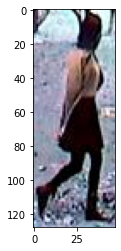

In [6]:
import cv2
imgSample = cv2.imread(starter_path+'/data/train/001/01_1.png')
plt.imshow(imgSample)
imgDim = imgSample.shape
print(imgDim)

### Load Dataset

In [59]:
def getCameraID(fileName):
  id = int(fileName.split('_')[0])
  return id

In [85]:
augment_dataset = False
trainImages = os.listdir(starter_path+'/data/train')
numClasses = len(trainImages)
trainImages = [[label, getCameraID(y), trainImages[label]+'/'+y] for label in range(len(trainImages)) for y in os.listdir(starter_path+'/data/train/'+trainImages[label]) ]
trainImagesCam1 = []
trainImagesCam2 = []
for i in range(len(trainImages)):
  img_path = os.path.join(starter_path+'/data/train', trainImages[i][2])
  image = read_image(img_path)
  # dataset augmentation
  if (augment_dataset):
    image_flipped = torch.flip(image, (2,))
  if trainImages[i][1]==1:
    trainImagesCam1.append([i, image])
    if (augment_dataset):
      trainImagesCam1.append([i, image_flipped])
  else:
    trainImagesCam2.append([i, image])
    if (augment_dataset):
      trainImagesCam2.append([i, image_flipped])
print(trainImages)
print(len(trainImages))

[[0, 2, '027/02_8.png'], [0, 2, '027/02_1.png'], [0, 1, '027/01_5.png'], [0, 1, '027/01_7.png'], [0, 1, '027/01_4.png'], [0, 1, '027/01_2.png'], [0, 2, '027/02_3.png'], [0, 2, '027/02_2.png'], [0, 2, '027/02_5.png'], [0, 1, '027/01_8.png'], [0, 1, '027/01_1.png'], [0, 2, '027/02_4.png'], [0, 2, '027/02_6.png'], [0, 1, '027/01_6.png'], [0, 1, '027/01_3.png'], [0, 2, '027/02_7.png'], [1, 2, '050/02_8.png'], [1, 2, '050/02_1.png'], [1, 1, '050/01_5.png'], [1, 1, '050/01_7.png'], [1, 1, '050/01_4.png'], [1, 1, '050/01_2.png'], [1, 2, '050/02_3.png'], [1, 2, '050/02_2.png'], [1, 2, '050/02_5.png'], [1, 1, '050/01_8.png'], [1, 1, '050/01_1.png'], [1, 2, '050/02_4.png'], [1, 2, '050/02_6.png'], [1, 1, '050/01_6.png'], [1, 1, '050/01_3.png'], [1, 2, '050/02_7.png'], [2, 2, '054/02_8.png'], [2, 2, '054/02_1.png'], [2, 1, '054/01_5.png'], [2, 1, '054/01_7.png'], [2, 1, '054/01_4.png'], [2, 1, '054/01_2.png'], [2, 2, '054/02_3.png'], [2, 2, '054/02_2.png'], [2, 2, '054/02_5.png'], [2, 1, '054/01_

In [86]:
transform_train_list = [
        transforms.ToPILImage(),
        transforms.Resize((128,48)),
        transforms.ToTensor(),
    ]
transform_train = transforms.Compose(transform_train_list)
target_transform = transforms.Lambda(lambda y: torch.zeros(numClasses, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

### Normalization

In [87]:
imgsCam1 = torch.stack([transform_train(x[1]) for x in trainImagesCam1], dim=3)
imgsCam2 = torch.stack([transform_train(x[1]) for x in trainImagesCam2], dim=3)
if not augment_dataset:
  imgsCam = torch.cat((imgsCam1, imgsCam2), 0)
  meanCam = imgsCam.view(3, -1).mean(dim=1)
  stdCam = imgsCam.view(3, -1).std(dim=1)
  meanCam1 = meanCam
  meanCam2 = meanCam
  stdCam1 = stdCam
  stdCam2 = stdCam
meanCam1 = imgsCam1.view(3, -1).mean(dim=1)
meanCam2 = imgsCam2.view(3, -1).mean(dim=1)
stdCam1 = imgsCam1.view(3, -1).std(dim=1)
stdCam2 = imgsCam2.view(3, -1).std(dim=1)

In [88]:
tranformNormCam1 = transforms.Normalize(meanCam1, stdCam1)
tranformNormCam2 = transforms.Normalize(meanCam2, stdCam2)

trainImagesCam1 = [[x[0], tranformNormCam1(transform_train(x[1]))] for x in trainImagesCam1]
trainImagesCam2 = [[x[0], tranformNormCam2(transform_train(x[1]))] for x in trainImagesCam2]

for x in trainImagesCam1:
  trainImages[x[0]][2] = x[1]
for x in trainImagesCam2:
  trainImages[x[0]][2] = x[1]

### Custom Dataset

In [89]:
class CustomDataset(Dataset):
  def __init__(self, images, transform=None, target_transform=None):
        self.images = images
        self.transform = transform
        self.target_transform = target_transform

  def __len__(self):
        return len(self.images)

  def __getitem__(self, idx):
        label = self.images[idx][0]
        image = self.images[idx][2]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [90]:
dataset = CustomDataset(trainImages, target_transform=target_transform)


### Model

In [91]:
from torch.nn import Conv2d,Linear, Module, Sequential,BatchNorm2d,MaxPool2d
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary

In [92]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [93]:
class ResidualBlock(Module):
  def __init__(self,in_channels,increase_dims=False,is_first=False):
        super(ResidualBlock, self).__init__()
        self.increase_dims = increase_dims
        self.is_first = is_first
        self.bn_0 = None
        self.conv_up = None
        out_channels = in_channels
        stride = 1
        if increase_dims:
          out_channels*=2
          stride*=2
          # self.conv_up = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=2,padding="same")
          self.conv_up = nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=1,stride=2)
        if not is_first:
          self.bn_0 = nn.Sequential(
              nn.BatchNorm2d(in_channels),
              nn.ELU()
          )
        if increase_dims:
          self.conv_1 = nn.Sequential(
              # nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride,padding="same"),
              nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride),
              nn.BatchNorm2d(out_channels),
              nn.ELU(),
              nn.Dropout(p=0.4)
          )
        else:
          self.conv_1 = nn.Sequential(
              nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride,padding="same"),
              # nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=3,stride=stride),
              nn.BatchNorm2d(out_channels),
              nn.ELU(),
              nn.Dropout(p=0.4)
          )
        self.conv_2 = nn.Conv2d(in_channels=out_channels,out_channels=out_channels,kernel_size=3,stride=1,padding="same")
  def forward(self,x):
      if self.bn_0:
        y = self.bn_0(x)
      else:
        y = x
      residual = x
      if self.increase_dims:
        y = F.pad(y, (0, 1, 0, 1))
      out = self.conv_1(y)
      out = self.conv_2(out)
      if self.conv_up:
        residual = self.conv_up(residual)
      return out+residual

In [94]:
class ReidModel1(Module):   
    def __init__(self, numClasses = 2, inference = False):
        super(ReidModel1, self).__init__()
        self.inference = inference
        self.numClasses = numClasses
        self.conv_1 = nn.Sequential(
          nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding="same"),
          nn.BatchNorm2d(32),
          nn.ELU()
        )
        self.conv_2 = nn.Sequential(
          nn.Conv2d(in_channels=32,out_channels=32,kernel_size=3,stride=1,padding="same"),
          nn.BatchNorm2d(32),
          nn.ELU()
        )
        # self.pool_3 = nn.MaxPool2d(kernel_size=3,stride=2,padding="same")
        self.pool_3 = nn.MaxPool2d(kernel_size=3,stride=2)
        
        self.residual_4 = ResidualBlock(in_channels=32,is_first=True)
        self.residual_5 = ResidualBlock(in_channels=32)
        self.residual_6 = ResidualBlock(in_channels=32,increase_dims=True)
        self.residual_7 = ResidualBlock(in_channels=64)
        self.residual_8 = ResidualBlock(in_channels=64,increase_dims=True)
        self.residual_9 = ResidualBlock(in_channels=128)

        self.dense_10 = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.4),
            nn.Linear(in_features=128*16*6,out_features=128),
            nn.BatchNorm1d(128),
            nn.ELU()
        )
        
        self.cosine_layer = nn.utils.weight_norm(nn.Linear(in_features=128,out_features=numClasses,bias=False))

    # Defining the forward pass    
    def forward(self, x):
        out = self.conv_1(x)
        out = self.conv_2(out)
        out = F.pad(out, (0, 1, 0, 1))
        out = self.pool_3(out)
        out = self.residual_4(out)
        out = self.residual_5(out)
        out = self.residual_6(out)
        out = self.residual_7(out)
        out = self.residual_8(out)
        out = self.residual_9(out)
        out = self.dense_10(out)
        out = nn.functional.normalize(out,p=2,dim=1)
        if (not self.inference):
          out = self.cosine_layer(out)
        # out = self.cosine_layer(out)
        return out

In [95]:
class ReidModelResnet50(Module):
  def __init__(self, numClasses = 2, inference = False):
    super(ReidModelResnet50, self).__init__()
    self.inference = inference
    self.numClasses = numClasses
    # load pretrained resnet50
    base_model = models.resnet50(pretrained = True, progress= False)
    base_model = torch.nn.Sequential(*(list(base_model.children())[:-1]))
    # freeze weights
    num_layers = len(list(base_model.children()))
    ct = 0
    for child in base_model.children():
      ct += 1
      if ct < (num_layers-2):
          for param in child.parameters():
              param.requires_grad = False
    self.base_model = base_model
    self.final_layer = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.4),
            nn.Linear(in_features=2048,out_features=128),
            nn.BatchNorm1d(128),
            nn.ELU()
        )
    self.cosine_layer = nn.utils.weight_norm(nn.Linear(in_features=128,out_features=numClasses,bias=False))
  def forward(self, x):
    out = self.base_model(x)
    # out = torch.squeeze(out, dim = 3)
    # out = torch.squeeze(out, dim = 2)
    out = self.final_layer(out)
    out = nn.functional.normalize(out,p=2,dim=1)
    if (not self.inference):
      out = self.cosine_layer(out)
    return out



In [96]:
model = ReidModel1()
model.to(device)
summary(model, (3, 128, 48))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 32, 128, 48]             896
       BatchNorm2d-2          [-1, 32, 128, 48]              64
               ELU-3          [-1, 32, 128, 48]               0
            Conv2d-4          [-1, 32, 128, 48]           9,248
       BatchNorm2d-5          [-1, 32, 128, 48]              64
               ELU-6          [-1, 32, 128, 48]               0
         MaxPool2d-7           [-1, 32, 64, 24]               0
            Conv2d-8           [-1, 32, 64, 24]           9,248
       BatchNorm2d-9           [-1, 32, 64, 24]              64
              ELU-10           [-1, 32, 64, 24]               0
          Dropout-11           [-1, 32, 64, 24]               0
           Conv2d-12           [-1, 32, 64, 24]           9,248
    ResidualBlock-13           [-1, 32, 64, 24]               0
      BatchNorm2d-14           [-1, 32,

### Training

In [97]:
from torch.utils.data import DataLoader, ConcatDataset
from torch.optim import Adam
from sklearn.model_selection import KFold

In [98]:
k_folds = 5
num_epochs = 200
batch_size = 16
torch.manual_seed(42)

In [99]:
def reset_weights(m):
  '''
    Try resetting model weights to avoid
    weight leakage.
  '''
  for layer in m.children():
    if hasattr(layer, 'reset_parameters'):
      # print(f'Reset trainable parameters of layer = {layer}')
      layer.reset_parameters()

Use GPU if available

In [100]:
def reset_net():
  global net
  net = ReidModel1(numClasses = 62, inference = False)
  net.to(device)
reset_net()

In [101]:
def train_epoch(trainDataset,criterion,optimizer):

    num_minibatches = len(trainDataset)//batch_size
    running_loss = 0.0
    for i, data in enumerate(trainDataset, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % (num_minibatches//5) == (num_minibatches//5-1):    # print every 100 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / (num_minibatches//5)))
        #     running_loss = 0.0
    return running_loss

#### Test Set

In [102]:
def test(testDataset,criterion):
    correct = 0
    loss = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testDataset:
            images, labels = data[0].to(device), data[1].to(device)
            # calculate outputs by running images through the network
            y_pred = net(images)

            # cross entropy loss
            loss += criterion(y_pred,labels).item()

            # get labels
            y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(y_pred_softmax, dim = 1) 
            _, labels = torch.max(labels, dim = 1) 

            # get accuracy
            correct += (predicted == labels).sum().item()

            # total items
            total += labels.size(0)

    return loss,100 * correct / total

#### KFold

In [103]:
from sklearn.model_selection import KFold

In [104]:
kfold = KFold(n_splits=k_folds,shuffle=True,random_state=42)

In [ ]:
results = {}
# K-fold Cross Validation model evaluation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
  
  # Print
  print(f'FOLD {fold}')
  print('--------------------------------')
  
  # Sample elements randomly from a given list of ids, no replacement.
  train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
  test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
  
  # Define data loaders for training and testing data in this fold
  trainloader = torch.utils.data.DataLoader(
                    dataset, 
                    batch_size=batch_size, sampler=train_subsampler)
  testloader = torch.utils.data.DataLoader(
                    dataset,
                    batch_size=batch_size, sampler=test_subsampler)
  
  # reset
  reset_net()
  criterion = nn.CrossEntropyLoss()
  optimizer = Adam(net.parameters())
  # train
  for epoch in range(num_epochs):
    loss = train_epoch(trainloader,criterion,optimizer)
    val_loss,val_acc = test(testloader,criterion)
    print(f'Epoch\t{epoch+1}\tloss:{loss:.4f}\tval_loss:{val_loss:.4f}\tval_acc:{val_acc:.4f}')
  # test
  results[fold] = test(testloader,criterion)[1]
  print('--------------------------------')

print('--------------------------------')
sum = 0.0
for key, value in results.items():
  print(f'Fold {key}: {value} %')
  sum += value
print(f'Average: {sum/len(results.keys())} %')

Final Training on complete dataset

In [105]:
datasetLoader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle = True)
reset_net()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters(), lr=0.001)
for epoch in range(num_epochs):
  loss = train_epoch(datasetLoader,criterion,optimizer)
  print(f'Epoch\t{epoch+1}\tloss:{loss:.4f}')

Epoch	1	loss:247.7756
Epoch	2	loss:235.6063
Epoch	3	loss:228.7535
Epoch	4	loss:224.0611
Epoch	5	loss:220.9146
Epoch	6	loss:218.0343
Epoch	7	loss:215.8363
Epoch	8	loss:213.9032
Epoch	9	loss:212.0274
Epoch	10	loss:210.3511
Epoch	11	loss:208.4299
Epoch	12	loss:206.8100
Epoch	13	loss:205.5051
Epoch	14	loss:204.0831
Epoch	15	loss:202.3464
Epoch	16	loss:200.9103
Epoch	17	loss:199.0337
Epoch	18	loss:197.4425
Epoch	19	loss:195.7312
Epoch	20	loss:194.4198
Epoch	21	loss:193.0611
Epoch	22	loss:191.5699
Epoch	23	loss:189.8680
Epoch	24	loss:188.5545
Epoch	25	loss:187.1185
Epoch	26	loss:185.3115
Epoch	27	loss:184.1459
Epoch	28	loss:182.5926
Epoch	29	loss:181.0249
Epoch	30	loss:179.6246
Epoch	31	loss:178.4659
Epoch	32	loss:176.4783
Epoch	33	loss:175.1363
Epoch	34	loss:173.8298
Epoch	35	loss:172.3137
Epoch	36	loss:170.8670
Epoch	37	loss:169.5342
Epoch	38	loss:168.1134
Epoch	39	loss:166.3854
Epoch	40	loss:165.3801
Epoch	41	loss:163.8467
Epoch	42	loss:162.2243
Epoch	43	loss:160.9397
Epoch	44	loss:159.47

In [106]:
PATH = './final_model.pth'
torch.save(net.state_dict(), PATH)

### Evaluation

In [32]:
!apt install libomp-dev
!pip install faiss
!pip install faiss-gpu

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (247 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Selecting previously unselected package libomp-dev.
Preparing to unpack .../libomp-dev_5.0.1-1_amd64.deb ...
Unpacking libomp-dev (5.0.1-

In [107]:
# Evaluation 
# Acknowledgement: the code is based on Siddhant Kapil's repo on LA-Transformer

from __future__ import print_function

import os, sys
import faiss
import numpy as np

from PIL import Image
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

from utils import get_id
from metrics import rank1, rank5, calc_ap



# ### Set feature volume sizes (height, width, depth) 
# TODO: update with your model's feature length

batch_size = 1
H, W, D = 1, 1, 128 # for dummymodel we have feature volume 7x7x2048

# ### Load Model

# TODO: Uncomment the following lines to load the Implemented and trained Model

save_path = "final_model.pth"
model = ReidModel1(numClasses = numClasses, inference=True)
model.load_state_dict(torch.load(save_path), strict=False)
model.eval()

# TODO: Comment out the dummy model
# model = DummyModel(batch_size, H, W, D)

# ### Data Loader for query and gallery

# TODO: For demo, we have resized to 224x224 during data augmentation
# You are free to use augmentations of your own choice
transform = [transforms.Resize((128,48)),
        transforms.ToTensor()]
transformCam1 = [
        transforms.Normalize(meanCam1, stdCam1)
    ]
transformCam2 = [
        transforms.Normalize(meanCam2, stdCam2)
    ]

data_transforms = {
        'basic': transforms.Compose( transform ),
        'Cam1': transforms.Compose( transformCam1 ),
        'Cam2': transforms.Compose(transformCam2)
    }


image_datasets = {}
data_dir = starter_path+"/data/val"

image_datasets['query'] = datasets.ImageFolder(os.path.join(data_dir, 'query'), data_transforms['basic'])
image_datasets['gallery'] = datasets.ImageFolder(os.path.join(data_dir, 'gallery'), data_transforms['basic'])
query_loader = DataLoader(dataset = image_datasets['query'], batch_size=batch_size, shuffle=False )
gallery_loader = DataLoader(dataset = image_datasets['gallery'], batch_size=batch_size, shuffle=False)

class_names = image_datasets['query'].classes


# ###  Extract Features
def extract_feature_alt(dataset):
  features =  torch.FloatTensor()
  cam_labels, _ = get_id(dataset.imgs)
  for i in tqdm(range(len(dataset))):
    if (cam_labels[i]=='1'):
      img = data_transforms['Cam1'](dataset[i][0])
    else:
      img = data_transforms['Cam2'](dataset[i][0])
    img = img[None, :]
    output = model(img)
    output = output[None, None, :]
    features = torch.cat((features, output.detach().cpu()), 0)
  return features

def extract_feature(dataloaders):
    
    features =  torch.FloatTensor()
    count = 0
    idx = 0
    for data in tqdm(dataloaders):
        img, label = data
        # print(label)
        # Uncomment if using GPU for inference
        #img, label = img.cuda(), label.cuda()

        output = model(img) # (B, D, H, W) --> B: batch size, HxWxD: feature volume size
        n, c, h, w = img.size()
        
        count += n
        features = torch.cat((features, output.detach().cpu()), 0)
        idx += 1
    return features

# Extract Query Features

query_feature= extract_feature_alt(image_datasets['query'])

# Extract Gallery Features

gallery_feature = extract_feature_alt(image_datasets['gallery'])

# Retrieve labels

gallery_path = image_datasets['gallery'].imgs
query_path = image_datasets['query'].imgs

gallery_cam,gallery_label = get_id(gallery_path)
query_cam,query_label = get_id(query_path)


# ## Concat Averaged GELTs
concatenated_query_vectors = []
for query in tqdm(query_feature):
    fnorm = torch.norm(query, p=2, dim=0, keepdim=True)#*np.sqrt(H*W)
    query_norm = query.div(fnorm.expand_as(query))
    concatenated_query_vectors.append(query_norm.view((-1)))

concatenated_gallery_vectors = []
for gallery in tqdm(gallery_feature):
    fnorm = torch.norm(gallery, p=2, dim=0, keepdim=True)#*np.sqrt(H*W)
    gallery_norm = gallery.div(fnorm.expand_as(gallery))
    concatenated_gallery_vectors.append(gallery_norm.view((-1)))
  

# ## Calculate Similarity using FAISS

index = faiss.IndexIDMap(faiss.IndexFlatIP(H*W*D))

index.add_with_ids(np.array([t.numpy() for t in concatenated_gallery_vectors]),np.array(gallery_label))

def search(query: str, k=1):
    encoded_query = query.unsqueeze(dim=0).numpy()
    top_k = index.search(encoded_query, k)
    return top_k


# ### Evaluate 

rank1_score = 0
rank5_score = 0
ap = 0
count = 0
for query, label in zip(concatenated_query_vectors, query_label):
    count += 1
    label = label
    output = search(query, k=10)
    rank1_score += rank1(label, output) 
    rank5_score += rank5(label, output) 
    print("Correct: {}, Total: {}, Incorrect: {}".format(rank1_score, count, count-rank1_score), end="\r")
    ap += calc_ap(label, output)

print("Rank1: %.3f, Rank5: %.3f, mAP: %.3f"%(rank1_score/len(query_feature), 
                                             rank5_score/len(query_feature), 
                                             ap/len(query_feature)))    

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

Rank1: 0.929, Rank5: 1.000, mAP: 0.828
